In [177]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())


In [182]:
target_user = ("@BBC", "@CBS","@CNN", "@FoxNews" ,"@nytimes")
df=pd.DataFrame()
sentiments = []
compound_mean=[]
for user in target_user:
    counter = 1

#     # Variables for holding sentiments
#     compound_list = []
#     positive_list = []
#     negative_list = []
#     neutral_list = []
    


    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        polarity_score = analyzer.polarity_scores(tweet["text"])
        compound = polarity_score["compound"]
        pos = polarity_score["pos"]
        neu = polarity_score["neu"]
        neg = polarity_score["neg"]
         # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                           "User" : user})
#         compound_list.append(compound)

#         compound_mean.append({"Coumpound_avg":np.mean(compound_list)})

        counter=counter+1
    
#     Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd
# compound_pd = pd.DataFrame.from_dict(compound_mean)
# compound_pd

   
            

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,-0.6249,Mon Mar 26 19:03:02 +0000 2018,0.806,0.194,0.000,1,@BBC
1,0.7783,Mon Mar 26 18:24:04 +0000 2018,0.688,0.000,0.312,2,@BBC
2,0.0000,Mon Mar 26 17:30:04 +0000 2018,1.000,0.000,0.000,3,@BBC
3,0.5859,Mon Mar 26 16:25:02 +0000 2018,0.787,0.000,0.213,4,@BBC
4,-0.3818,Mon Mar 26 15:45:04 +0000 2018,0.744,0.161,0.095,5,@BBC
5,0.0000,Mon Mar 26 15:11:57 +0000 2018,1.000,0.000,0.000,6,@BBC
6,0.0000,Mon Mar 26 12:58:02 +0000 2018,1.000,0.000,0.000,7,@BBC
7,0.4404,Mon Mar 26 11:48:03 +0000 2018,0.828,0.000,0.172,8,@BBC
8,-0.5106,Mon Mar 26 11:00:05 +0000 2018,0.837,0.163,0.000,9,@BBC
9,-0.1280,Mon Mar 26 10:00:07 +0000 2018,0.930,0.070,0.000,10,@BBC


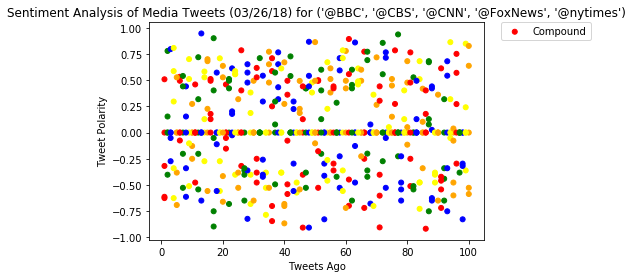

In [183]:
# Create plot
colors = ( "red", "green", "blue", "yellow", "orange")

plt.scatter(sentiments_pd["Tweets Ago"],
            sentiments_pd["Compound"], 
            s = 25, c = colors)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s) for %s" % (time.strftime("%x"),target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [190]:
Compound_avgs=[]
for user in target_user:
    df = sentiments_pd.loc[sentiments_pd["User"] == user]
    Compound_avgs.append(df["Compound"].mean())
Compound_avgs

[0.06572099999999999,
 0.3497249999999999,
 -0.05970699999999999,
 -0.063838,
 -0.106507]

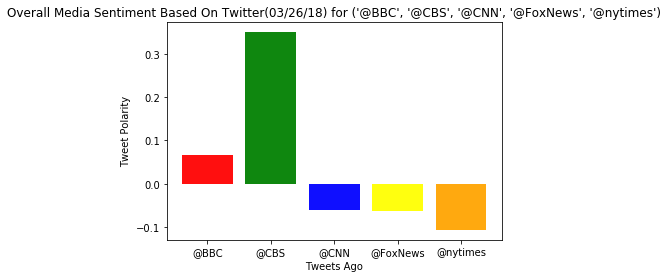

In [198]:
plt.bar(target_user, Compound_avgs , color= colors , alpha=0.5)
plt.title("Overall Media Sentiment Based On Twitter(%s) for %s" % (time.strftime("%x"),target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()